In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Define column names based on the dataset structure
column_names = [
    'unit_number',           # Column 1
    'time_in_cycles',        # Column 2
    'operational_setting_1',  # Column 3
    'operational_setting_2',  # Column 4
    'operational_setting_3',  # Column 5
    'sensor_measurement_1',  # Column 6
    'sensor_measurement_2',  # Column 7
    'sensor_measurement_3',  # Column 8
    'sensor_measurement_4',  # Column 9
    'sensor_measurement_5',  # Column 10
    'sensor_measurement_6',  # Column 11
    'sensor_measurement_7',  # Column 12
    'sensor_measurement_8',  # Column 13
    'sensor_measurement_9',  # Column 14
    'sensor_measurement_10', # Column 15
    'sensor_measurement_11', # Column 16
    'sensor_measurement_12', # Column 17
    'sensor_measurement_13', # Column 18
    'sensor_measurement_14', # Column 19
    'sensor_measurement_15', # Column 20
    'sensor_measurement_16', # Column 21
    'sensor_measurement_17', # Column 22
    'sensor_measurement_18', # Column 23
    'sensor_measurement_19', # Column 24
    'sensor_measurement_20', # Column 25
    'sensor_measurement_21'  # Column 26
]


In [87]:
base_dir = 'data/CMaps'

In [88]:
for dataset_num in range(1, 5):
    dataset_id = f'FD{dataset_num:03d}'
    
    # Convert train file
    train_df = pd.read_csv(f'{base_dir}/train_{dataset_id}.txt', sep='\s+', header=None, names=column_names)
    train_df.to_csv(f'{base_dir}/train_{dataset_id}.csv', index=False)
    
    # Convert test file
    test_df = pd.read_csv(f'{base_dir}/test_{dataset_id}.txt', sep='\s+', header=None, names=column_names)
    test_df.to_csv(f'{base_dir}/test_{dataset_id}.csv', index=False)
    
    # Convert RUL file
    rul_df = pd.read_csv(f'{base_dir}/RUL_{dataset_id}.txt', sep='\s+', header=None, names=['RUL'])
    rul_df.to_csv(f'{base_dir}/RUL_{dataset_id}.csv', index=False)
    
    print(f"✓ Converted {dataset_id}")

print("Done!")

✓ Converted FD001
✓ Converted FD002
✓ Converted FD003
✓ Converted FD004
Done!


In [89]:
# Check if train and test engines are the same or different
print("Checking engine overlap between train and test:")
print(f"Train engine IDs: {sorted(fd01['unit_number'].unique())[:10]}... (showing first 10)")
print(f"Test engine IDs: {sorted(fd01_test['unit_number'].unique())[:10]}... (showing first 10)")

# Check if same IDs exist in both
train_engine_set = set(fd01['unit_number'].unique())
test_engine_set = set(fd01_test['unit_number'].unique())
overlap = train_engine_set.intersection(test_engine_set)

print(f"\nEngine ID overlap: {len(overlap)} engines have same ID numbers")
print(f"BUT: These are DIFFERENT physical engines!")
print(f"Training engines 1-100 are different from test engines 1-100")
print(f"\nThis is correct - NASA dataset uses sequential numbering in each set")
print(f"Each set has its own fleet of engines")


Checking engine overlap between train and test:
Train engine IDs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]... (showing first 10)
Test engine IDs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]... (showing first 10)

Engine ID overlap: 100 engines have same ID numbers
BUT: These are DIFFERENT physical engines!
Training engines 1-100 are different from test engines 1-100

This is correct - NASA dataset uses sequential numbering in each set
Each set has its own fleet of engines


In [90]:
# %%
'''start with FD001'''
fd01=pd.read_csv('data_csv/train_FD001.csv')
fd01_test=pd.read_csv('data_csv/test_FD001.csv')
fd01_rul=pd.read_csv('data_csv/RUL_FD001.csv')

fd01.head()


,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [91]:
fd01['RUL'] = fd01.groupby('unit_number')['time_in_cycles'].transform(lambda x: x.max() - x)
fd01.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


# Step 1: Data Exploration and Preprocessing


In [92]:
# Basic data info
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Training data shape: {fd01.shape}")
print(f"Test data shape: {fd01_test.shape}")
print(f"Number of unique engines (train): {fd01['unit_number'].nunique()}")
print(f"Number of unique engines (test): {fd01_test['unit_number'].nunique()}")
print(f"\nRUL range in training: {fd01['RUL'].min()} to {fd01['RUL'].max()} cycles")
print(f"Average RUL: {fd01['RUL'].mean():.2f} cycles")
print(f"\nMissing values in training: {fd01.isnull().sum().sum()}")
print(f"Missing values in test: {fd01_test.isnull().sum().sum()}")


DATASET OVERVIEW
Training data shape: (20631, 27)
Test data shape: (13096, 26)
Number of unique engines (train): 100
Number of unique engines (test): 100

RUL range in training: 0 to 361 cycles
Average RUL: 107.81 cycles

Missing values in training: 0
Missing values in test: 0


In [93]:
# Check cycles per engine
cycles_per_engine = fd01.groupby('unit_number')['time_in_cycles'].max()
print(cycles_per_engine)
print("Engine lifetime statistics:")
print(cycles_per_engine.describe())
print(f"\nMin cycles: {cycles_per_engine.min()}")
print(f"Max cycles: {cycles_per_engine.max()}")
print(f"Mean cycles: {cycles_per_engine.mean():.2f}")


unit_number
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: time_in_cycles, Length: 100, dtype: int64
Engine lifetime statistics:
count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: time_in_cycles, dtype: float64

Min cycles: 128
Max cycles: 362
Mean cycles: 206.31


In [94]:
# Check for constant sensors (zero variance)
sensor_cols = [col for col in fd01.columns if 'sensor_measurement' in col]
operational_cols = [col for col in fd01.columns if 'operational_setting' in col]

# Calculate standard deviation for each sensor
sensor_std = fd01[sensor_cols].std()
print(sensor_std)
constant_sensors = sensor_std[sensor_std == 0].index.tolist()

print("Constant sensors (zero variance):")
if constant_sensors:
    print(constant_sensors)
else:
    print("None - all sensors have variance")

print(f"\nLow variance sensors (< 0.01):")
low_variance = sensor_std[sensor_std < 0.01].index.tolist()
print(low_variance if low_variance else "None")

max_variance_sensor = sensor_std.idxmax()
print(f"\nSensor with highest variance: {max_variance_sensor}")
print(f"Variance: {sensor_std[max_variance_sensor]:.4f}")


sensor_measurement_1     6.537152e-11
sensor_measurement_2     5.000533e-01
sensor_measurement_3     6.131150e+00
sensor_measurement_4     9.000605e+00
sensor_measurement_5     3.394700e-12
sensor_measurement_6     1.388985e-03
sensor_measurement_7     8.850923e-01
sensor_measurement_8     7.098548e-02
sensor_measurement_9     2.208288e+01
sensor_measurement_10    4.660829e-13
sensor_measurement_11    2.670874e-01
sensor_measurement_12    7.375534e-01
sensor_measurement_13    7.191892e-02
sensor_measurement_14    1.907618e+01
sensor_measurement_15    3.750504e-02
sensor_measurement_16    1.556432e-14
sensor_measurement_17    1.548763e+00
sensor_measurement_18    0.000000e+00
sensor_measurement_19    0.000000e+00
sensor_measurement_20    1.807464e-01
sensor_measurement_21    1.082509e-01
dtype: float64
Constant sensors (zero variance):
['sensor_measurement_18', 'sensor_measurement_19']

Low variance sensors (< 0.01):
['sensor_measurement_1', 'sensor_measurement_5', 'sensor_measurement_6

In [95]:
# Statistical summary of sensors
print("Sensor statistics:")
print(fd01[sensor_cols].describe().T)


Sensor statistics:
                         count         mean           std        min  \
sensor_measurement_1   20631.0   518.670000  6.537152e-11   518.6700   
sensor_measurement_2   20631.0   642.680934  5.000533e-01   641.2100   
sensor_measurement_3   20631.0  1590.523119  6.131150e+00  1571.0400   
sensor_measurement_4   20631.0  1408.933782  9.000605e+00  1382.2500   
sensor_measurement_5   20631.0    14.620000  3.394700e-12    14.6200   
sensor_measurement_6   20631.0    21.609803  1.388985e-03    21.6000   
sensor_measurement_7   20631.0   553.367711  8.850923e-01   549.8500   
sensor_measurement_8   20631.0  2388.096652  7.098548e-02  2387.9000   
sensor_measurement_9   20631.0  9065.242941  2.208288e+01  9021.7300   
sensor_measurement_10  20631.0     1.300000  4.660829e-13     1.3000   
sensor_measurement_11  20631.0    47.541168  2.670874e-01    46.8500   
sensor_measurement_12  20631.0   521.413470  7.375534e-01   518.6900   
sensor_measurement_13  20631.0  2388.096152  

In [96]:
engine_data

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588,4
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127,3
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,2
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,1


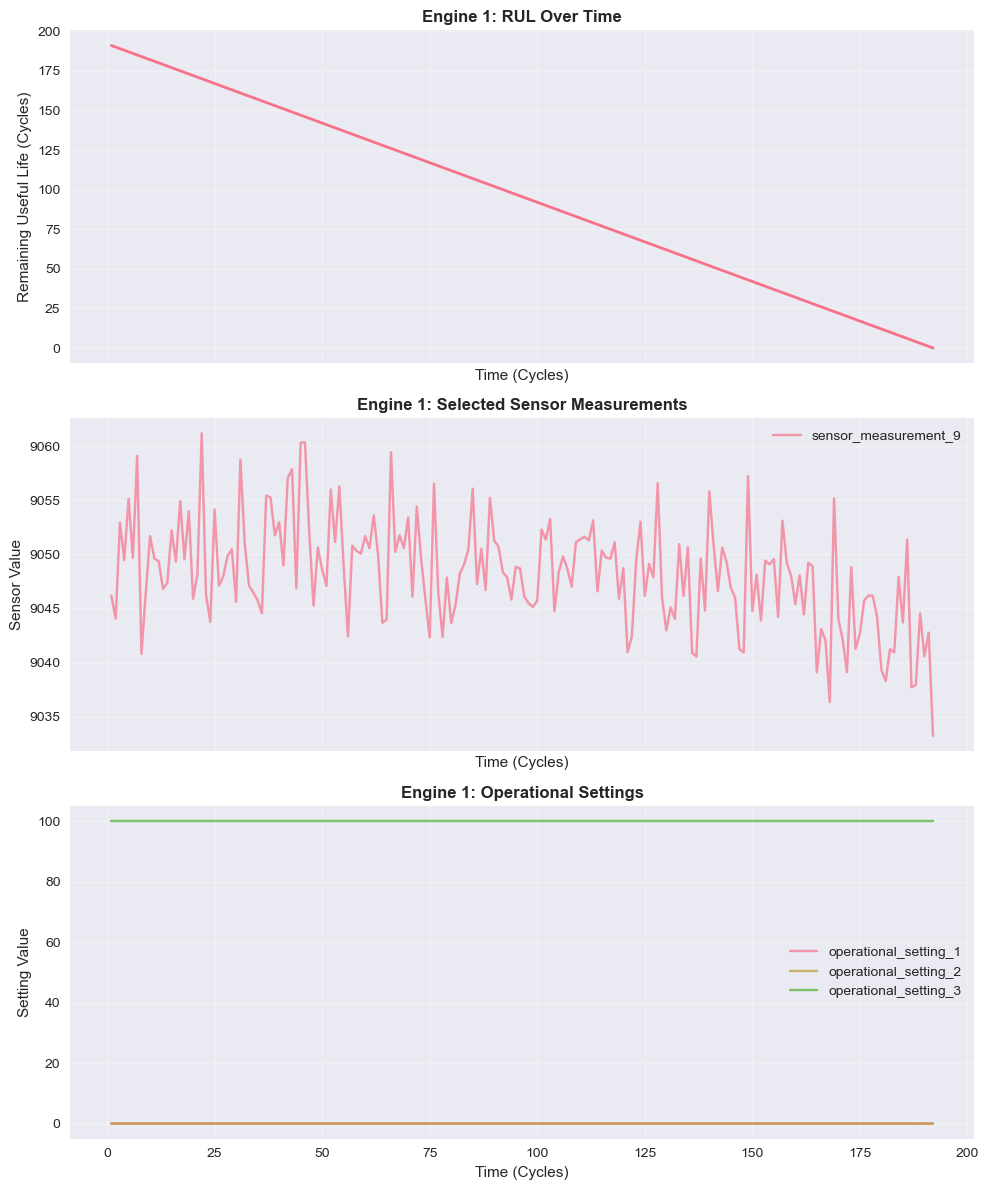

In [97]:

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Visualize sensor trends for a sample engine
sample_engine = 1
engine_data = fd01[fd01['unit_number'] == sample_engine]

# Create figure with 3 subplots (one row, three columns)
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
# Plot RUL over time
axes[0].plot(engine_data['time_in_cycles'], engine_data['RUL'], linewidth=2 , )
axes[0].set_title(f'Engine {sample_engine}: RUL Over Time', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Time (Cycles)')
axes[0].set_ylabel('Remaining Useful Life (Cycles)')
axes[0].grid(True, alpha=0.3)

# Plot a few key sensors
# sensors_to_plot = ['sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_7']
sensors=["sensor_measurement_9"]
for sensor in sensors:
    axes[1].plot(engine_data['time_in_cycles'], engine_data[sensor], label=sensor, alpha=0.7)
axes[1].set_title(f'Engine {sample_engine}: Selected Sensor Measurements', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Time (Cycles)')
axes[1].set_ylabel('Sensor Value')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot operational settings
for op_setting in operational_cols:
    axes[2].plot(engine_data['time_in_cycles'], engine_data[op_setting], label=op_setting, alpha=0.7)
axes[2].set_title(f'Engine {sample_engine}: Operational Settings', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Time (Cycles)')
axes[2].set_ylabel('Setting Value')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [98]:
# Correlation between sensors and RUL
correlations = fd01[sensor_cols + ['RUL']].corr()['RUL'].sort_values(ascending=False)
print("Top sensors correlated with RUL:")
print(correlations.head(10))
print("\nBottom sensors correlated with RUL:")
print(correlations.tail(10))



Top sensors correlated with RUL:
RUL                      1.000000
sensor_measurement_12    0.671983
sensor_measurement_7     0.657223
sensor_measurement_21    0.635662
sensor_measurement_20    0.629428
sensor_measurement_6    -0.128348
sensor_measurement_14   -0.306769
sensor_measurement_9    -0.390102
sensor_measurement_13   -0.562569
sensor_measurement_8    -0.563968
Name: RUL, dtype: float64

Bottom sensors correlated with RUL:
sensor_measurement_2    -0.606484
sensor_measurement_15   -0.642667
sensor_measurement_4    -0.678948
sensor_measurement_11   -0.696228
sensor_measurement_1          NaN
sensor_measurement_5          NaN
sensor_measurement_10         NaN
sensor_measurement_16         NaN
sensor_measurement_18         NaN
sensor_measurement_19         NaN
Name: RUL, dtype: float64


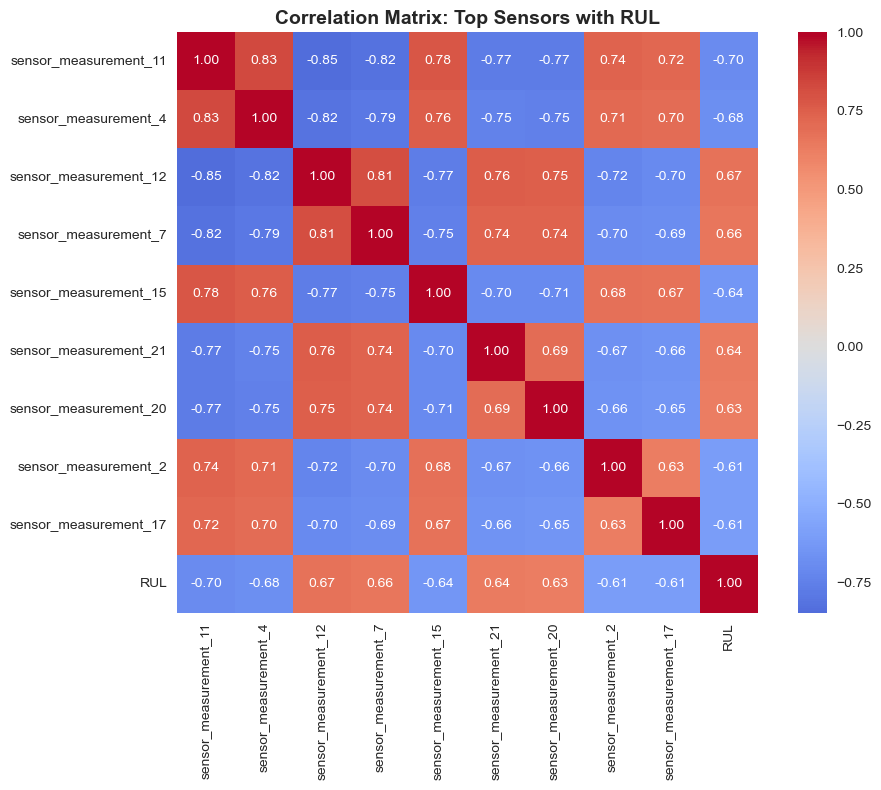

In [99]:
# Visualize correlation heatmap for top sensors
top_sensors = correlations.abs().nlargest(10).index.tolist()
if 'RUL' in top_sensors:
    top_sensors.remove('RUL')
top_sensors.append('RUL')

corr_matrix = fd01[top_sensors].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix: Top Sensors with RUL', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


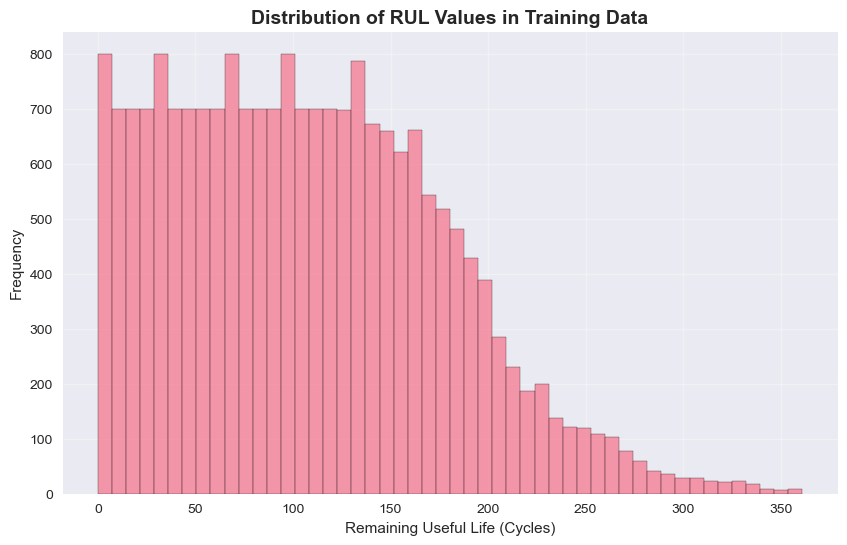

In [100]:
# Distribution of RUL values
plt.figure(figsize=(10, 6))
plt.hist(fd01['RUL'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Remaining Useful Life (Cycles)')
plt.ylabel('Frequency')
plt.title('Distribution of RUL Values in Training Data', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()


## Preprocessing: Identify features to use


In [101]:
# Identify sensors to keep (exclude constant/low variance sensors)
sensors_to_keep = [s for s in sensor_cols if s not in constant_sensors and s not in low_variance]
print(f"Total sensors: {len(sensor_cols)}")
print(f"Sensors to keep: {len(sensors_to_keep)}")
print(f"Sensors to exclude: {len(sensor_cols) - len(sensors_to_keep)}")

# All features to use (operational settings + selected sensors)
features_to_use = operational_cols + sensors_to_keep
print(f"\nTotal features for modeling: {len(features_to_use)}")
print(f"  - Operational settings: {len(operational_cols)}")
print(f"  - Sensor measurements: {len(sensors_to_keep)}")


Total sensors: 21
Sensors to keep: 14
Sensors to exclude: 7

Total features for modeling: 17
  - Operational settings: 3
  - Sensor measurements: 14


In [102]:
# Save feature list for later use
selected_features = features_to_use.copy()
print("Selected features saved!")
print(f"Features: {selected_features[:5]}... (showing first 5)")


Selected features saved!
Features: ['operational_setting_1', 'operational_setting_2', 'operational_setting_3', 'sensor_measurement_2', 'sensor_measurement_3']... (showing first 5)


## Step 1 Complete: Normalize Data


In [103]:
# Prepare data: select features and normalize
from sklearn.preprocessing import StandardScaler

# Get selected features (from previous cell)
X_train = fd01[selected_features].copy()
                   = fd01['RUL'].copy()

X_test = fd01_test[selected_features].copy()
y_test = fd01_rul['RUL'].values

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_df = pd.DataFrame(X_test_scaled, columns=selected_features)

print("Data normalized!")
print(f"Train shape: {X_train_df.shape}")
print(f"Test shape: {X_test_df.shape}")
print(f"Features: {len(selected_features)}")


IndentationError: unexpected indent (3822478176.py, line 6)

In [ ]:
# Quick check: show normalized data stats
print("Normalized training data stats:")
print(X_train_df.describe().T.head())


Normalized training data stats:
                         count          mean       std       min       25%  \
operational_setting_1  20631.0  1.377622e-18  1.000024 -3.973523 -0.681734   
operational_setting_2  20631.0 -2.720802e-17  1.000024 -2.055419 -0.690488   
operational_setting_3  20631.0  0.000000e+00  0.000000  0.000000  0.000000   
sensor_measurement_2   20631.0  6.410348e-14  1.000024 -2.941625 -0.711809   
sensor_measurement_3   20631.0 -4.959437e-14  1.000024 -3.177804 -0.695338   

                            50%       75%       max  
operational_setting_1  0.004055  0.689845  3.981634  
operational_setting_2 -0.008022  1.015677  2.039375  
operational_setting_3  0.000000  0.000000  0.000000  
sensor_measurement_2  -0.081860  0.638080  3.697829  
sensor_measurement_3  -0.069013  0.629079  4.303846  


✅ **Step 1 Complete!** Data is explored, features selected, and normalized.

---

# Step 2: Create Sequences for RNN


In [105]:
# Function to create sequences from engine data
def create_sequences(data, rul, sequence_length=30):
    """
    Create sequences for RNN
    - data: features for each engine
    - rul: RUL values
    - sequence_length: how many past cycles to use
    Returns: sequences, RUL values, and engine IDs
    """
    X_seq = []
    y_seq = []
    engine_ids = []
    
    # Group by engine
    for unit_id in data['unit_number'].unique():
        engine_data = data[data['unit_number'] == unit_id][selected_features].values
        engine_rul = rul[data['unit_number'] == unit_id].values
        
        # Create sequences for this engine
        for i in range(len(engine_data) - sequence_length + 1):
            X_seq.append(engine_data[i:i+sequence_length])
            y_seq.append(engine_rul[i+sequence_length-1])
            engine_ids.append(unit_id)  # Track which engine this sequence belongs to
    
    return np.array(X_seq), np.array(y_seq), np.array(engine_ids)


In [120]:
# Add unit_number back to normalized data for sequence creation
X_train_df['unit_number'] = fd01['unit_number'].values
X_test_df['unit_number'] = fd01_test['unit_number'].values

# Create sequences
sequence_length = 30 # Use last 30 cycles to predict RUL
print(f"Creating sequences with length: {sequence_length}")

X_train_seq, y_train_seq, train_engine_ids = create_sequences(X_train_df, y_train, sequence_length)
print(f"Train sequences: {X_train_seq.shape}")
print(f"Train RUL: {y_train_seq.shape}")
print(f"Unique engines in sequences: {len(np.unique(train_engine_ids))}")


Creating sequences with length: 30
Train sequences: (17731, 30, 17)
Train RUL: (17731,)
Unique engines in sequences: 100


In [121]:
# For test data: use last sequence_length cycles from each engine
def create_test_sequences(data, sequence_length=30):
    """Create test sequences - use last N cycles from each engine"""
    X_seq = []
    engine_ids = []
    
    for unit_id in data['unit_number'].unique():
        engine_data = data[data['unit_number'] == unit_id][selected_features].values
        
        # Take last sequence_length cycles
        if len(engine_data) >= sequence_length:
            X_seq.append(engine_data[-sequence_length:])
        else:
            # Pad if engine has fewer cycles
            padding = np.zeros((sequence_length - len(engine_data), len(selected_features)))
            X_seq.append(np.vstack([padding, engine_data]))
        
        engine_ids.append(unit_id)
    
    return np.array(X_seq), np.array(engine_ids)

X_test_seq, test_engine_ids = create_test_sequences(X_test_df, sequence_length)
print(f"Test sequences: {X_test_seq.shape}")
print(f"Test engines: {len(test_engine_ids)}")


Test sequences: (100, 30, 17)
Test engines: 100


In [122]:
# Split by engine ID (not random) - ensures no engine in both train and val
unique_engines = np.unique(train_engine_ids)
np.random.seed(42)
np.random.shuffle(unique_engines)

# Split engines: 80% train, 20% validation
split_idx = int(len(unique_engines) * 0.8)
train_engines = unique_engines[:split_idx]
val_engines = unique_engines[split_idx:]

# Get indices for train and validation sequences
train_mask = np.isin(train_engine_ids, train_engines)
val_mask = np.isin(train_engine_ids, val_engines)

X_train_final = X_train_seq[train_mask]
y_train_final = y_train_seq[train_mask]
X_val = X_train_seq[val_mask]
y_val = y_train_seq[val_mask]

print("Split by engine ID (no data leakage):")
print(f"Train engines: {len(train_engines)} (IDs: {train_engines[:5]}...{train_engines[-5:]})")
print(f"Val engines: {len(val_engines)} (IDs: {val_engines[:5]}...{val_engines[-5:]})")
print(f"\nFinal data shapes:")
print(f"Train X: {X_train_final.shape}, Train y: {y_train_final.shape}")
print(f"Val X: {X_val.shape}, Val y: {y_val.shape}")
print(f"Test X: {X_test_seq.shape}, Test y: {y_test.shape}")


Split by engine ID (no data leakage):
Train engines: 80 (IDs: [84 54 71 46 45]...[58 76 33 95 60])
Val engines: 20 (IDs: [64 85 38 30  2]...[61 72 15 93 52])

Final data shapes:
Train X: (14020, 30, 17), Train y: (14020,)
Val X: (3711, 30, 17), Val y: (3711,)
Test X: (100, 30, 17), Test y: (100,)


In [123]:
# Quick check: show sequence structure
print("Sequence structure:")
print(f"Each sequence has: {X_train_final.shape[1]} time steps")
print(f"Each time step has: {X_train_final.shape[2]} features")
print(f"\nExample: First sequence shape = {X_train_final[0].shape}")
print(f"First sequence RUL = {y_train_final[0]}")


Sequence structure:
Each sequence has: 30 time steps
Each time step has: 17 features

Example: First sequence shape = (30, 17)
First sequence RUL = 162


In [124]:
# Import PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cpu


In [125]:
# Verify input dimensions
print("Input dimensions explained:")
print(f"X_train_final shape: {X_train_final.shape}")
print(f"  - Samples: {X_train_final.shape[0]}")
print(f"  - Time steps: {X_train_final.shape[1]} (sequence length)")
print(f"  - Features per time step: {X_train_final.shape[2]}")
print(f"\nTotal values per sample: {X_train_final.shape[1]} × {X_train_final.shape[2]} = {X_train_final.shape[1] * X_train_final.shape[2]}")
print(f"\nThe LSTM processes:")
print(f"  ✓ All {X_train_final.shape[1]} time steps")
print(f"  ✓ Each with {X_train_final.shape[2]} features")
print(f"  ✓ So we use ALL {X_train_final.shape[1] * X_train_final.shape[2]} values!")


Input dimensions explained:
X_train_final shape: (14020, 30, 17)
  - Samples: 14020
  - Time steps: 30 (sequence length)
  - Features per time step: 17

Total values per sample: 30 × 17 = 510

The LSTM processes:
  ✓ All 30 time steps
  ✓ Each with 17 features
  ✓ So we use ALL 510 values!


## How LSTM Knows About 30 Time Steps?

**Key Point:** LSTM doesn't need to be told "30" - it processes sequences **dynamically**!

- LSTM processes sequences of **any length**
- The sequence length comes from the **input data shape**
- When we pass `(batch, 30, 17)`, LSTM automatically processes all 30 steps
- No fixed "30" parameter in the model - it's flexible!


In [126]:
# Demonstrate: LSTM processes sequence length from input shape
print("How LSTM handles sequence length:")
print("-" * 50)

# Create a test input with shape (batch=2, timesteps=30, features=17)
test_input = torch.randn(2, 30, 17)  # 2 samples, 30 steps, 17 features
print(f"Input shape: {test_input.shape}")
print(f"  - Batch size: {test_input.shape[0]}")
print(f"  - Sequence length (time steps): {test_input.shape[1]} ← LSTM reads this!")
print(f"  - Features per step: {test_input.shape[2]}")

# Create a simple LSTM to show it processes all steps
test_lstm = nn.LSTM(input_size=17, hidden_size=64, batch_first=True)
output, (hidden, cell) = test_lstm(test_input)

print(f"\nLSTM output shape: {output.shape}")
print(f"  - LSTM processed all {output.shape[1]} time steps automatically!")
print(f"  - Output has {output.shape[2]} hidden features per step")
print(f"\nFinal hidden state shape: {hidden.shape}")
print(f"  - This is the 'memory' after processing all {test_input.shape[1]} steps")

print("\n✅ LSTM automatically processes whatever sequence length you give it!")
print("   No need to specify '30' in the model - it's in the data shape!")


How LSTM handles sequence length:
--------------------------------------------------
Input shape: torch.Size([2, 30, 17])
  - Batch size: 2
  - Sequence length (time steps): 30 ← LSTM reads this!
  - Features per step: 17

LSTM output shape: torch.Size([2, 30, 64])
  - LSTM processed all 30 time steps automatically!
  - Output has 64 hidden features per step

Final hidden state shape: torch.Size([1, 2, 64])
  - This is the 'memory' after processing all 30 steps

✅ LSTM automatically processes whatever sequence length you give it!
   No need to specify '30' in the model - it's in the data shape!


In [127]:
# Simple Dataset class for PyTorch
class EngineDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets
train_dataset = EngineDataset(X_train_final, y_train_final)
val_dataset = EngineDataset(X_val, y_val)
test_dataset = EngineDataset(X_test_seq, y_test)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Train batches: {len(train_loader)}")
print(f"Val batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")


Train batches: 220
Val batches: 58
Test batches: 2


In [128]:

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2, dropout=0.2):
        super(LSTMModel, self).__init__()
        
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout if num_layers > 1 else 0,
            batch_first=True
        )
        
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        # x shape: (batch, sequence_length, features)
        lstm_out, _ = self.lstm(x)
        # Take last output
        last_output = lstm_out[:, -1, :]
        # Predict RUL
        rul = self.fc(last_output)
        return rul.squeeze()

# Create model
input_size = len(selected_features)  # 17 features
model = LSTMModel(input_size=input_size, hidden_size=64, num_layers=2)
model = model.to(device)

print("Model created!")
print(f"Parameters: {sum(p.numel() for p in model.parameters()):,}")


Model created!
Parameters: 54,593


In [129]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Loss: MSE")
print("Optimizer: Adam (lr=0.001)")


Loss: MSE
Optimizer: Adam (lr=0.001)


In [130]:

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    
    for X_batch, y_batch in loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        # Forward pass
        optimizer.zero_grad()
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    return total_loss / len(loader)

# Validation function
def validate(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            total_loss += loss.item()
    
    return total_loss / len(loader)

print("Training functions ready!")


Training functions ready!


In [131]:
from tqdm import tqdm

# Train model
num_epochs = 20
train_losses = []
val_losses = []

print("Starting training...")
print("-" * 50)

for epoch in tqdm(range(num_epochs), desc="Training Epochs"):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss = validate(model, val_loader, criterion, device)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    tqdm.write(f"Epoch {epoch+1}/{num_epochs} | Train: {train_loss:.4f} | Val: {val_loss:.4f}")

print("-" * 50)
print("Training complete!")


Starting training...
--------------------------------------------------


Training Epochs:   5%|▌         | 1/20 [00:05<01:44,  5.52s/it]

Epoch 1/20 | Train: 10485.5396 | Val: 10557.9202


Training Epochs:  10%|█         | 2/20 [00:10<01:30,  5.03s/it]

Epoch 2/20 | Train: 8288.2679 | Val: 8623.1023


Training Epochs:  15%|█▌        | 3/20 [00:14<01:23,  4.90s/it]

Epoch 3/20 | Train: 6657.2286 | Val: 7061.5833


Training Epochs:  20%|██        | 4/20 [00:19<01:18,  4.88s/it]

Epoch 4/20 | Train: 5415.4712 | Val: 5838.3414


Training Epochs:  25%|██▌       | 5/20 [00:24<01:10,  4.70s/it]

Epoch 5/20 | Train: 4422.1565 | Val: 4858.0175


Training Epochs:  30%|███       | 6/20 [00:28<01:05,  4.65s/it]

Epoch 6/20 | Train: 3620.6049 | Val: 4068.3972


Training Epochs:  35%|███▌      | 7/20 [00:33<01:01,  4.73s/it]

Epoch 7/20 | Train: 3009.1228 | Val: 3455.6042


Training Epochs:  40%|████      | 8/20 [00:37<00:55,  4.59s/it]

Epoch 8/20 | Train: 2538.5273 | Val: 2978.8680


Training Epochs:  45%|████▌     | 9/20 [00:42<00:51,  4.67s/it]

Epoch 9/20 | Train: 2145.8765 | Val: 2579.5348


Training Epochs:  50%|█████     | 10/20 [00:47<00:45,  4.59s/it]

Epoch 10/20 | Train: 1837.7414 | Val: 2270.9033


Training Epochs:  55%|█████▌    | 11/20 [00:51<00:40,  4.53s/it]

Epoch 11/20 | Train: 1604.7896 | Val: 2025.7273


Training Epochs:  60%|██████    | 12/20 [00:56<00:36,  4.54s/it]

Epoch 12/20 | Train: 1417.5508 | Val: 1841.8321


Training Epochs:  65%|██████▌   | 13/20 [01:01<00:32,  4.64s/it]

Epoch 13/20 | Train: 1269.5986 | Val: 1715.1658


Training Epochs:  70%|███████   | 14/20 [01:05<00:27,  4.65s/it]

Epoch 14/20 | Train: 1141.8071 | Val: 1613.5653


Training Epochs:  75%|███████▌  | 15/20 [01:10<00:22,  4.58s/it]

Epoch 15/20 | Train: 1042.7323 | Val: 1539.2422


Training Epochs:  80%|████████  | 16/20 [01:14<00:18,  4.54s/it]

Epoch 16/20 | Train: 956.4823 | Val: 1465.2224


Training Epochs:  85%|████████▌ | 17/20 [01:18<00:13,  4.49s/it]

Epoch 17/20 | Train: 896.6438 | Val: 1482.3823


Training Epochs:  90%|█████████ | 18/20 [01:23<00:08,  4.43s/it]

Epoch 18/20 | Train: 834.3093 | Val: 1321.4639


Training Epochs:  95%|█████████▌| 19/20 [01:27<00:04,  4.52s/it]

Epoch 19/20 | Train: 761.3820 | Val: 1302.0729


Training Epochs: 100%|██████████| 20/20 [01:32<00:00,  4.65s/it]

Epoch 20/20 | Train: 716.3921 | Val: 1346.2189
--------------------------------------------------
Training complete!


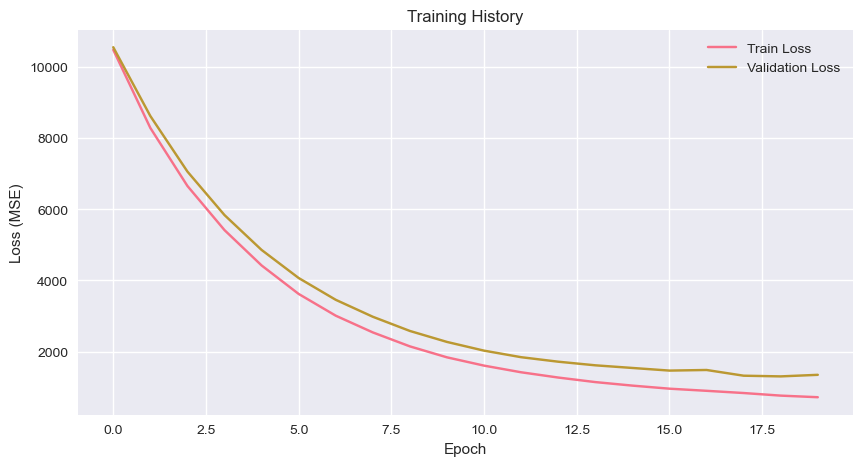

In [132]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()


In [133]:
# Evaluate on test set
model.eval()
test_predictions = []
test_actuals = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        predictions = model(X_batch)
        
        test_predictions.extend(predictions.cpu().numpy())
        test_actuals.extend(y_batch.numpy())

test_predictions = np.array(test_predictions)
test_actuals = np.array(test_actuals)

# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test_actuals, test_predictions)
rmse = np.sqrt(mean_squared_error(test_actuals, test_predictions))
r2 = r2_score(test_actuals, test_predictions)

print("Test Set Results:")
print(f"MAE: {mae:.2f} cycles")
print(f"RMSE: {rmse:.2f} cycles")
print(f"R² Score: {r2:.4f}")


Test Set Results:
MAE: 18.14 cycles
RMSE: 25.38 cycles
R² Score: 0.6270


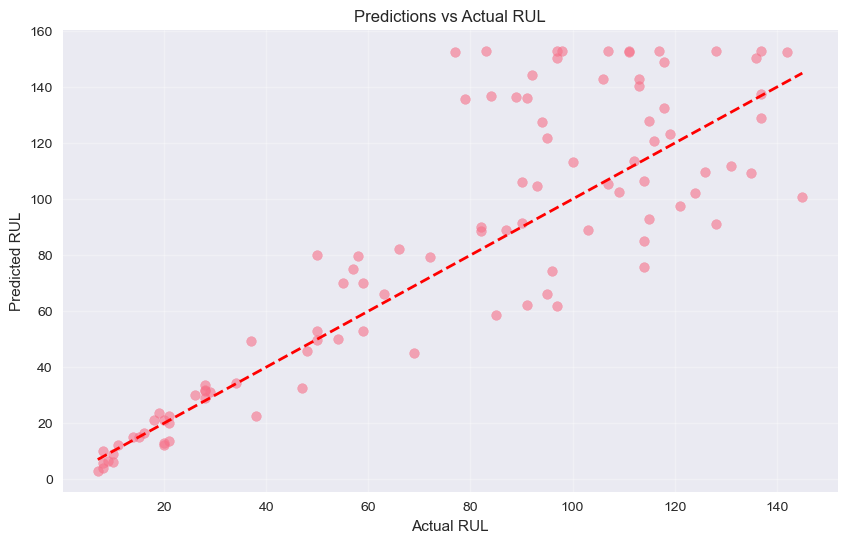

In [134]:
# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(test_actuals, test_predictions, alpha=0.6)
plt.plot([test_actuals.min(), test_actuals.max()], 
         [test_actuals.min(), test_actuals.max()], 'r--', lw=2)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Predictions vs Actual RUL')
plt.grid(True, alpha=0.3)
plt.show()


✅ **Step 3 Complete!** LSTM model trained and evaluated.

**Results:**
- Model: 2-layer LSTM with 64 hidden units
- Training: 20 epochs
- Metrics: MAE, RMSE, R² on test set

---

# Step 4: Compare LSTM, GRU, and CNN-LSTM Models


In [135]:
# Save LSTM results
lstm_results = {
    'model_name': 'LSTM',
    'mae': mae,
    'rmse': rmse,
    'r2': r2,
    'predictions': test_predictions.copy(),
    'actuals': test_actuals.copy()
}
print("LSTM results saved for comparison")


LSTM results saved for comparison


In [136]:
# GRU Model (same structure as LSTM, just different cell type)
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2, dropout=0.2):
        super(GRUModel, self).__init__()
        
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout if num_layers > 1 else 0,
            batch_first=True
        )
        
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        gru_out, _ = self.gru(x)
        last_output = gru_out[:, -1, :]
        rul = self.fc(last_output)
        return rul.squeeze()

# CNN-LSTM Model (CNN extracts features, then LSTM processes sequences)
class CNNLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2, dropout=0.2):
        super(CNNLSTMModel, self).__init__()
        
        # CNN layers to extract features
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        
        # LSTM processes CNN features
        self.lstm = nn.LSTM(
            input_size=32,  # After CNN
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout if num_layers > 1 else 0,
            batch_first=True
        )
        
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        # x shape: (batch, timesteps, features)
        # Transpose for CNN: (batch, features, timesteps)
        x = x.transpose(1, 2)
        
        # CNN feature extraction
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        
        # Transpose back: (batch, timesteps, features)
        x = x.transpose(1, 2)
        
        # LSTM processing
        lstm_out, _ = self.lstm(x)
        last_output = lstm_out[:, -1, :]
        rul = self.fc(last_output)
        return rul.squeeze()

print("GRU and CNN-LSTM models defined!")


GRU and CNN-LSTM models defined!


In [139]:
from tqdm import tqdm

# Function to train and evaluate a model
def train_and_evaluate_model(model_class, model_name, num_epochs=20):
    print(f"\n{'='*60}")
    print(f"Training {model_name}")
    print(f"{'='*60}")
    
    # Create model
    model = model_class(input_size=len(selected_features), hidden_size=64, num_layers=2)
    model = model.to(device)
    
    # Setup
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training
    train_losses = []
    val_losses = []
    
    # Progress bar for epochs
    pbar = tqdm(range(num_epochs), desc=f"{model_name} Training")
    
    for epoch in pbar:
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss = validate(model, val_loader, criterion, device)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        # Update progress bar description
        pbar.set_postfix({
            "Train": f"{train_loss:.2f}",
            "Val": f"{val_loss:.2f}"
        })
    
    # Evaluate on test set
    model.eval()
    test_predictions = []
    test_actuals = []
    
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            predictions = model(X_batch)
            test_predictions.extend(predictions.cpu().numpy())
            test_actuals.extend(y_batch.numpy())
    
    test_predictions = np.array(test_predictions)
    test_actuals = np.array(test_actuals)
    
    # Calculate metrics
    mae = mean_absolute_error(test_actuals, test_predictions)
    rmse = np.sqrt(mean_squared_error(test_actuals, test_predictions))
    r2 = r2_score(test_actuals, test_predictions)
    
    return {
        'model_name': model_name,
        'mae': mae,
        'rmse': rmse,
        'r2': r2,
        'predictions': test_predictions,
        'actuals': test_actuals,
        'train_losses': train_losses,
        'val_losses': val_losses
    }

print("Training function ready with tqdm!")


Training function ready with tqdm!


In [140]:
# Train GRU model
gru_results = train_and_evaluate_model(GRUModel, 'GRU', num_epochs=20)



Training GRU


GRU Training: 100%|██████████| 20/20 [03:15<00:00,  9.79s/it, Train=698.12, Val=1226.97]  


In [141]:
# Train CNN-LSTM model
cnnlstm_results = train_and_evaluate_model(CNNLSTMModel, 'CNN-LSTM', num_epochs=20)



Training CNN-LSTM


CNN-LSTM Training: 100%|██████████| 20/20 [01:09<00:00,  3.48s/it, Train=659.46, Val=1491.23]  


In [142]:
# Compare all models
print("\n" + "="*60)
print("MODEL COMPARISON RESULTS")
print("="*60)

results_df = pd.DataFrame([
    {
        'Model': lstm_results['model_name'],
        'MAE': lstm_results['mae'],
        'RMSE': lstm_results['rmse'],
        'R²': lstm_results['r2']
    },
    {
        'Model': gru_results['model_name'],
        'MAE': gru_results['mae'],
        'RMSE': gru_results['rmse'],
        'R²': gru_results['r2']
    },
    {
        'Model': cnnlstm_results['model_name'],
        'MAE': cnnlstm_results['mae'],
        'RMSE': cnnlstm_results['rmse'],
        'R²': cnnlstm_results['r2']
    }
])

print(results_df.to_string(index=False))

# Find best model
best_model_idx = results_df['MAE'].idxmin()
best_model = results_df.loc[best_model_idx, 'Model']
print(f"\n🏆 Best Model: {best_model} (Lowest MAE: {results_df.loc[best_model_idx, 'MAE']:.2f})")



MODEL COMPARISON RESULTS
   Model       MAE      RMSE       R²
    LSTM 18.141006 25.378519 0.627031
     GRU 20.789133 28.310268 0.535882
CNN-LSTM 21.403357 28.326780 0.535340

🏆 Best Model: LSTM (Lowest MAE: 18.14)


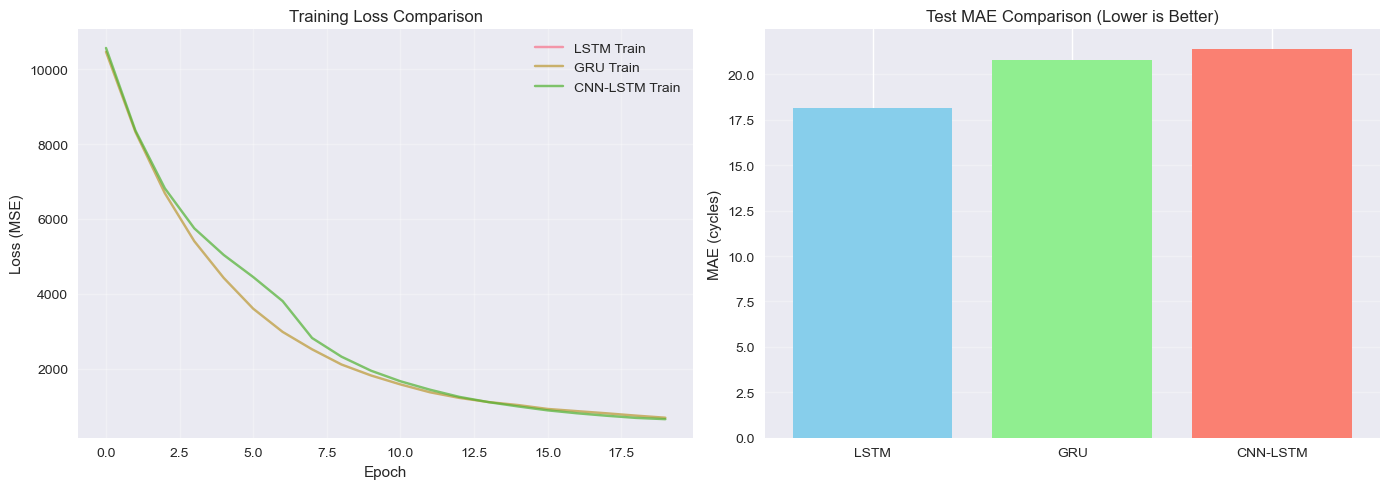

In [143]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training curves
axes[0].plot(lstm_results.get('train_losses', []), label='LSTM Train', alpha=0.7)
axes[0].plot(gru_results['train_losses'], label='GRU Train', alpha=0.7)
axes[0].plot(cnnlstm_results['train_losses'], label='CNN-LSTM Train', alpha=0.7)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Training Loss Comparison')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Metrics bar chart
models = results_df['Model'].values
mae_values = results_df['MAE'].values
axes[1].bar(models, mae_values, color=['skyblue', 'lightgreen', 'salmon'])
axes[1].set_ylabel('MAE (cycles)')
axes[1].set_title('Test MAE Comparison (Lower is Better)')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


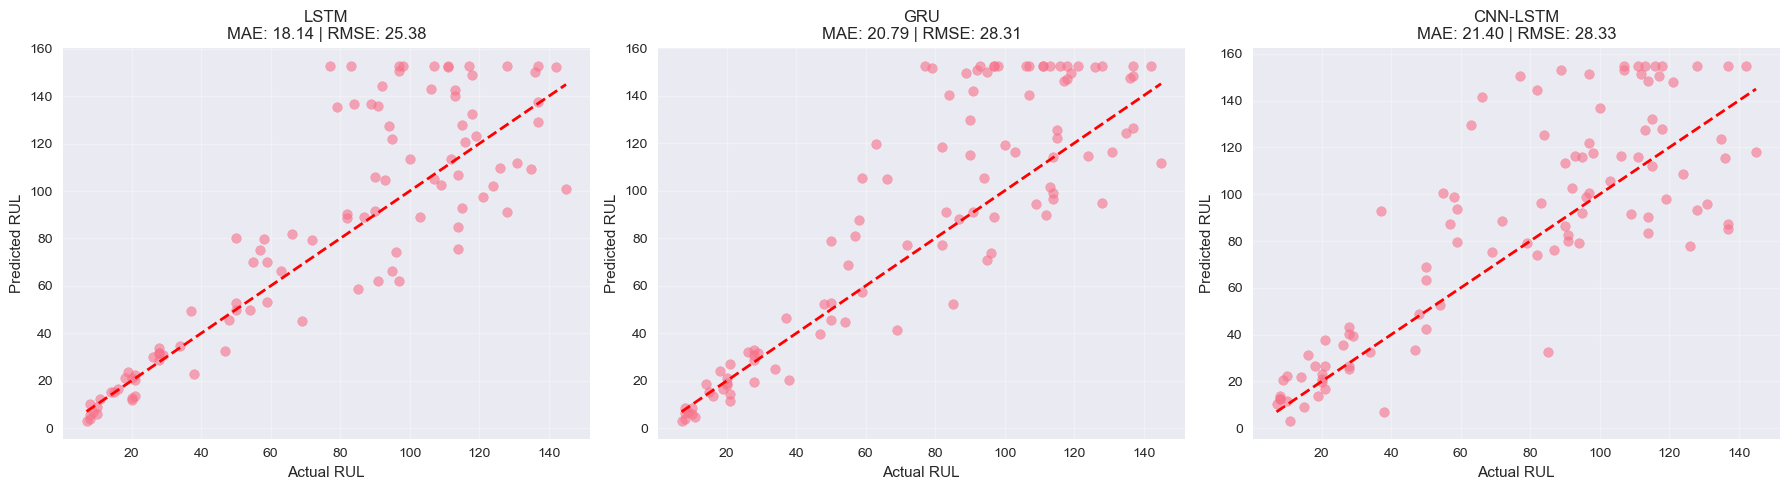

In [144]:
# Predictions vs Actual for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_data = [
    (lstm_results, 'LSTM'),
    (gru_results, 'GRU'),
    (cnnlstm_results, 'CNN-LSTM')
]

for idx, (results, name) in enumerate(models_data):
    axes[idx].scatter(results['actuals'], results['predictions'], alpha=0.6)
    axes[idx].plot([results['actuals'].min(), results['actuals'].max()], 
                   [results['actuals'].min(), results['actuals'].max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual RUL')
    axes[idx].set_ylabel('Predicted RUL')
    axes[idx].set_title(f'{name}\nMAE: {results["mae"]:.2f} | RMSE: {results["rmse"]:.2f}')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


✅ **Model Comparison Complete!**

**Summary:**
- ✅ LSTM: Baseline model
- ✅ GRU: Simpler, faster alternative
- ✅ CNN-LSTM: Hybrid approach with feature extraction

**Best model selected based on lowest MAE.**

---

# Step 5: Explainability (XAI) - Understanding Model Decisions


## What is Explainability?

**Goal:** Understand WHY the model makes predictions

**Questions we answer:**
- Which sensors are most important for RUL prediction?
- How does each sensor affect the prediction?
- Why did the model predict low RUL for a specific engine?

**Why it matters:**
- Engineers can trust and understand predictions
- Identify which sensors to monitor
- Debug model issues
- Make better maintenance decisions


In [146]:
# Method 2: Gradient-based Feature Importance (for Neural Networks)
# HOW: Use gradients to see which features the LSTM model is sensitive to
# WHY: Shows which features the ACTUAL LSTM model uses for predictions

print("Calculating gradient-based importance for LSTM model...")

# Function to get gradients for a sample
def get_feature_gradients(model, sample, target):
    """Get gradients of prediction w.r.t. input features"""
    sample_tensor = torch.FloatTensor(sample).unsqueeze(0).to(device)
    sample_tensor.requires_grad = True
    
    model.eval()
    prediction = model(sample_tensor)
    
    # Backward pass to get gradients
    prediction.backward()
    
    # Get gradients (average across time steps)
    gradients = sample_tensor.grad.data.cpu().numpy()[0]
    # Average gradients across 30 time steps
    feature_gradients = np.abs(gradients).mean(axis=0)
    
    return feature_gradients

# Calculate gradients for a few samples
sample_indices = [0, 10, 20, 30, 40]  # Sample different engines
all_gradients = []

for idx in sample_indices:
    sample = X_test_seq[idx]
    target = y_test[idx]
    grads = get_feature_gradients(model, sample, target)
    all_gradients.append(grads)

# Average gradients across samples
avg_gradients = np.mean(all_gradients, axis=0)

# Create gradient importance dataframe
gradient_importance = pd.DataFrame({
    'Feature': selected_features,
    'Gradient_Importance': avg_gradients
}).sort_values('Gradient_Importance', ascending=False)

print("\nGradient-based Feature Importance (LSTM Model):")
print("="*60)
print(gradient_importance.head(10).to_string(index=False))
print("\n💡 Higher gradient = Model is more sensitive to changes in this feature")


Calculating gradient-based importance for LSTM model...

Gradient-based Feature Importance (LSTM Model):
              Feature  Gradient_Importance
 sensor_measurement_8             1.490922
sensor_measurement_21             1.405813
sensor_measurement_12             1.330620
 sensor_measurement_2             1.217453
 sensor_measurement_7             1.195620
sensor_measurement_11             1.103068
sensor_measurement_13             1.074199
sensor_measurement_14             1.021797
 sensor_measurement_9             0.992952
sensor_measurement_15             0.778665

💡 Higher gradient = Model is more sensitive to changes in this feature


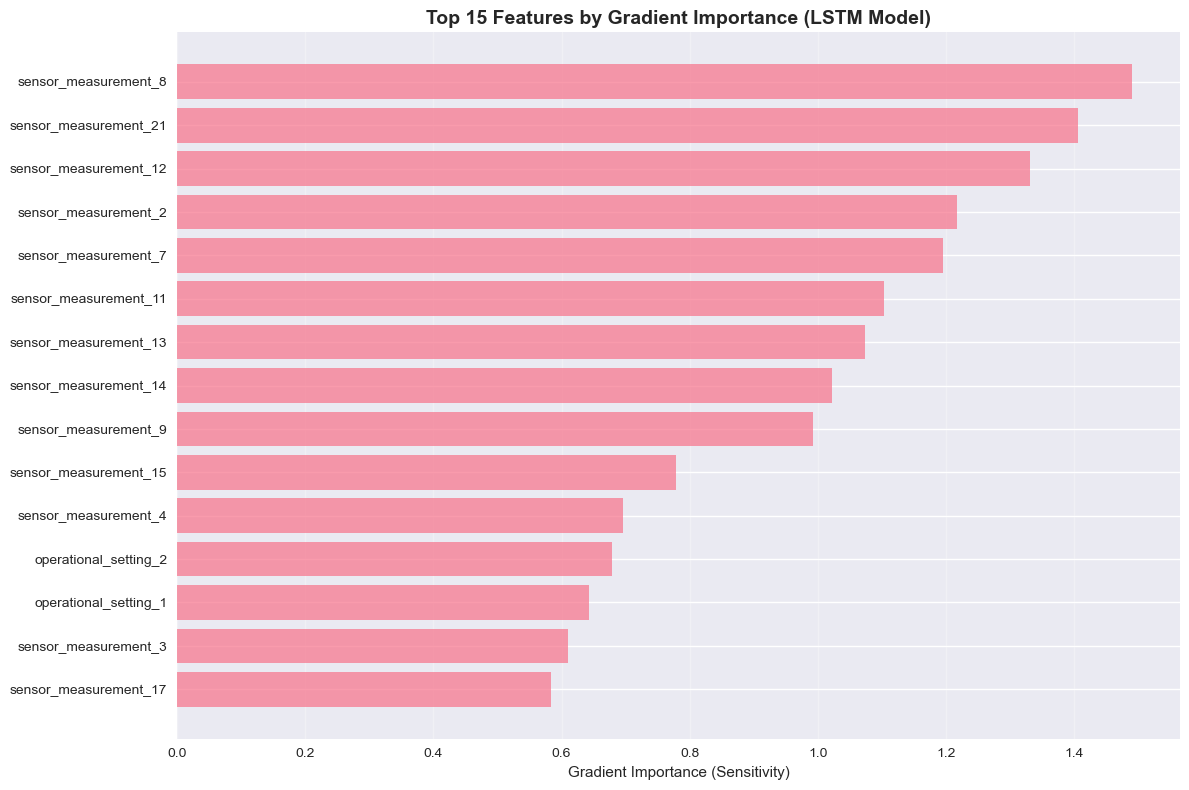


💡 Interpretation:
   - Higher gradient = LSTM prediction changes more when this feature changes
   - These are the features the LSTM model is most sensitive to
   - Shows what the ACTUAL LSTM model uses, not a proxy model


In [147]:
# Visualize gradient importance
plt.figure(figsize=(12, 8))
top_grad = gradient_importance.head(15)
plt.barh(range(len(top_grad)), top_grad['Gradient_Importance'], alpha=0.7)
plt.yticks(range(len(top_grad)), top_grad['Feature'])
plt.xlabel('Gradient Importance (Sensitivity)')
plt.title('Top 15 Features by Gradient Importance (LSTM Model)', 
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("   - Higher gradient = LSTM prediction changes more when this feature changes")
print("   - These are the features the LSTM model is most sensitive to")
print("   - Shows what the ACTUAL LSTM model uses, not a proxy model")


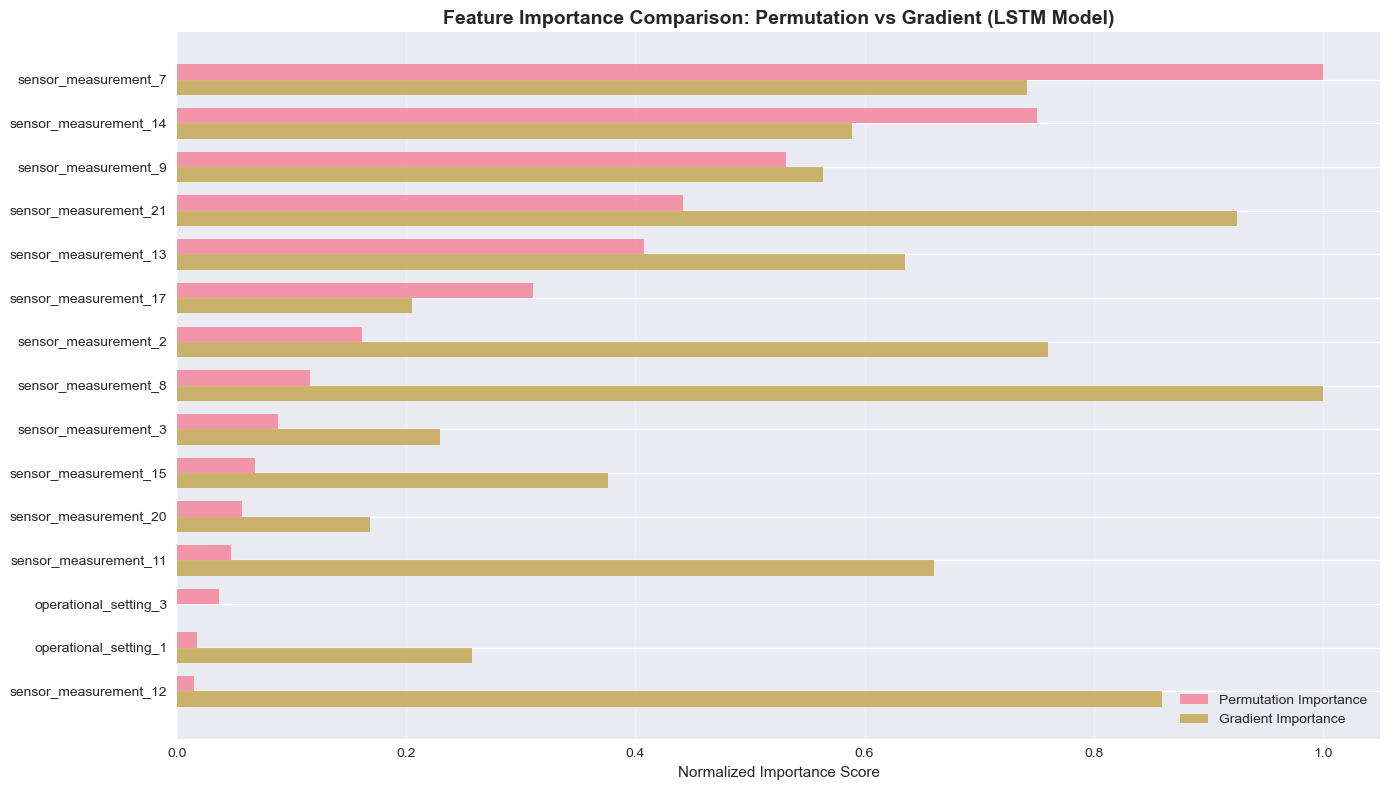


💡 Both methods show what the ACTUAL LSTM model uses:
   - Permutation: How much predictions degrade when feature is shuffled
   - Gradient: How sensitive the model is to feature changes
   - Agreement = More confident about feature importance


In [148]:
# Method 3: Compare both importance methods
plt.figure(figsize=(14, 8))

# Normalize both for comparison
perm_norm = (feature_importance['Importance'] - feature_importance['Importance'].min()) / \
            (feature_importance['Importance'].max() - feature_importance['Importance'].min() + 1e-8)
grad_norm = (gradient_importance['Gradient_Importance'] - gradient_importance['Gradient_Importance'].min()) / \
            (gradient_importance['Gradient_Importance'].max() - gradient_importance['Gradient_Importance'].min() + 1e-8)

# Merge for comparison
comparison = pd.DataFrame({
    'Feature': selected_features,
    'Permutation': perm_norm,
    'Gradient': grad_norm
}).sort_values('Permutation', ascending=False).head(15)

x = np.arange(len(comparison))
width = 0.35

plt.barh(x - width/2, comparison['Permutation'], width, label='Permutation Importance', alpha=0.7)
plt.barh(x + width/2, comparison['Gradient'], width, label='Gradient Importance', alpha=0.7)
plt.yticks(x, comparison['Feature'])
plt.xlabel('Normalized Importance Score')
plt.title('Feature Importance Comparison: Permutation vs Gradient (LSTM Model)', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n💡 Both methods show what the ACTUAL LSTM model uses:")
print("   - Permutation: How much predictions degrade when feature is shuffled")
print("   - Gradient: How sensitive the model is to feature changes")
print("   - Agreement = More confident about feature importance")


In [149]:
# Method 4: Analyze specific engine with low RUL using ACTUAL LSTM
# Find an engine with low predicted RUL and explain why using gradients

# Get predictions from LSTM model
model.eval()
lstm_predictions = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        preds = model(X_batch)
        lstm_predictions.extend(preds.cpu().numpy())
lstm_predictions = np.array(lstm_predictions)

low_rul_indices = np.where(lstm_predictions < 20)[0]  # Engines with RUL < 20

if len(low_rul_indices) > 0:
    example_idx = low_rul_indices[0]
    example_engine = test_engine_ids[example_idx]
    
    print(f"Example: Engine #{example_engine} has low RUL")
    print(f"  Predicted RUL (LSTM): {lstm_predictions[example_idx]:.2f} cycles")
    print(f"  Actual RUL: {y_test[example_idx]:.2f} cycles")
    print(f"\nWhy is RUL low? Using LSTM gradients to find important features:")
    
    # Get gradients for this specific engine
    sample = X_test_seq[example_idx]
    target = y_test[example_idx]
    engine_gradients = get_feature_gradients(model, sample, target)
    
    # Get feature values (average across time steps)
    engine_features = X_test_seq[example_idx].mean(axis=0)
    avg_features = X_test_seq.mean(axis=(0, 1))  # Average across all samples and time steps
    
    # Combine gradients and feature differences
    explanation = pd.DataFrame({
        'Feature': selected_features,
        'Gradient_Importance': engine_gradients,
        'Feature_Value': engine_features,
        'Avg_Value': avg_features,
        'Difference': engine_features - avg_features
    }).sort_values('Gradient_Importance', ascending=False)
    
    print("\nTop features contributing to low RUL (by gradient importance):")
    print(explanation.head(10)[['Feature', 'Gradient_Importance', 'Difference']].to_string(index=False))
    
    print("\n💡 Interpretation:")
    print("   - High gradient = LSTM is sensitive to this feature for this engine")
    print("   - Large difference = This engine's feature value differs from average")
    print("   - Both high = This feature likely causes the low RUL prediction")
else:
    print("No engines with very low RUL found in test set")


Example: Engine #20 has low RUL
  Predicted RUL (LSTM): 16.33 cycles
  Actual RUL: 16.00 cycles

Why is RUL low? Using LSTM gradients to find important features:

Top features contributing to low RUL (by gradient importance):
              Feature  Gradient_Importance  Difference
sensor_measurement_12             0.843468   -1.035751
sensor_measurement_11             0.562092    1.004989
 sensor_measurement_8             0.558913    0.827842
sensor_measurement_15             0.511635    0.972896
sensor_measurement_21             0.478004   -0.909527
 sensor_measurement_7             0.462685   -1.169586
sensor_measurement_13             0.444277    0.971349
sensor_measurement_20             0.385427   -0.927639
 sensor_measurement_4             0.382752    1.037906
 sensor_measurement_2             0.333097    0.958888

💡 Interpretation:
   - High gradient = LSTM is sensitive to this feature for this engine
   - Large difference = This engine's feature value differs from average
   - B

In [150]:
# Method 5: Validate LSTM is using sensible features
# HOW: Check correlation + compare with LSTM importance
# WHY: Confirms LSTM model logic makes sense

# Calculate correlation between features and RUL
correlations = []
for i, feature in enumerate(selected_features):
    # Use average feature value across time steps
    feature_values = X_test_seq[:, :, i].mean(axis=1)  # Average across time steps
    corr = np.corrcoef(feature_values, y_test)[0, 1]
    correlations.append({
        'Feature': feature,
        'Correlation': corr,
        'Abs_Correlation': abs(corr)
    })

corr_df = pd.DataFrame(correlations).sort_values('Abs_Correlation', ascending=False)

# Compare with LSTM importance
validation = pd.merge(
    feature_importance[['Feature', 'Importance']],
    corr_df[['Feature', 'Abs_Correlation']],
    on='Feature'
)
validation['Importance_Norm'] = (validation['Importance'] - validation['Importance'].min()) / \
                                (validation['Importance'].max() - validation['Importance'].min() + 1e-8)
validation['Corr_Norm'] = (validation['Abs_Correlation'] - validation['Abs_Correlation'].min()) / \
                         (validation['Abs_Correlation'].max() - validation['Abs_Correlation'].min() + 1e-8)

print("Validation: LSTM Importance vs Feature Correlation with RUL")
print("="*60)
print(validation.head(10).to_string(index=False))

print("\n💡 Interpretation:")
print("   - High correlation = Feature actually relates to RUL (ground truth)")
print("   - High LSTM importance = LSTM uses this feature")
print("   - Both high = LSTM is using sensible features ✅")
print("   - High correlation but low importance = LSTM might be missing something")
print("   - Low correlation but high importance = LSTM might be overfitting")


Validation: LSTM Importance vs Feature Correlation with RUL
              Feature  Importance  Abs_Correlation  Importance_Norm  Corr_Norm
 sensor_measurement_7    0.633897         0.727225         1.000000   0.916902
sensor_measurement_14    0.469942         0.280791         0.750809   0.342928
 sensor_measurement_9    0.325756         0.378956         0.531664   0.469137
sensor_measurement_21    0.266451         0.750158         0.441527   0.946386
sensor_measurement_13    0.244022         0.547414         0.407439   0.685721
sensor_measurement_17    0.180557         0.773051         0.310980   0.975820
 sensor_measurement_2    0.082201         0.745214         0.161491   0.940030
 sensor_measurement_8    0.052357         0.558534         0.116132   0.700019
 sensor_measurement_3    0.033821         0.791858         0.087958   1.000000
sensor_measurement_15    0.020573         0.757905         0.067824   0.956347

💡 Interpretation:
   - High correlation = Feature actually relates to 

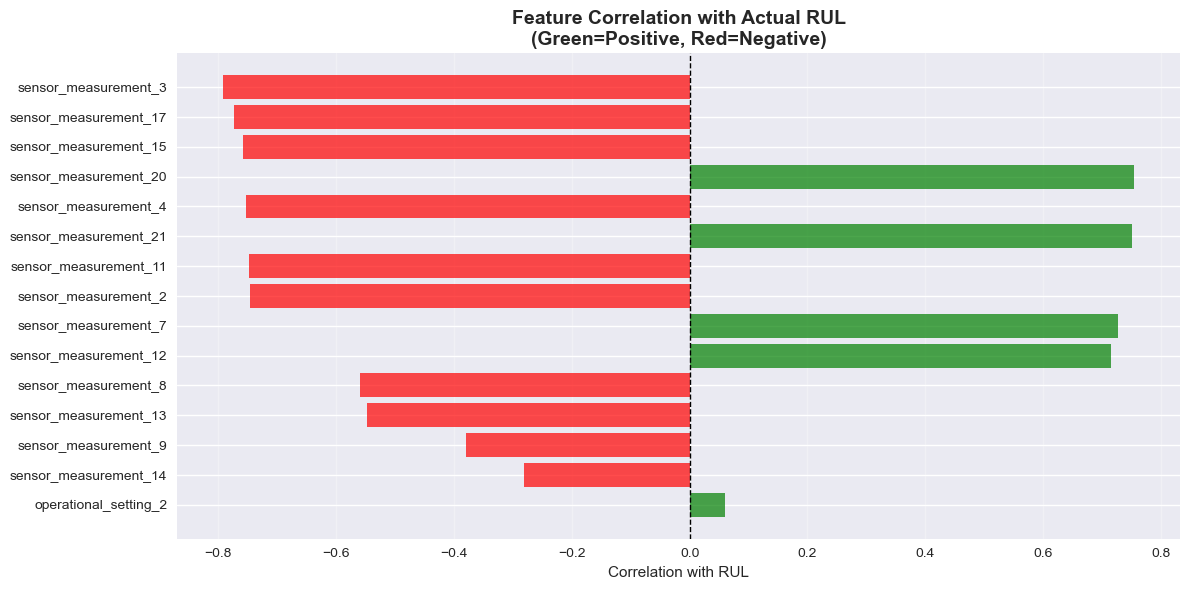

In [151]:
# Visualize correlation
plt.figure(figsize=(12, 6))
top_corr = corr_df.head(15)
colors = ['red' if x < 0 else 'green' for x in top_corr['Correlation']]
plt.barh(range(len(top_corr)), top_corr['Correlation'], color=colors, alpha=0.7)
plt.yticks(range(len(top_corr)), top_corr['Feature'])
plt.xlabel('Correlation with RUL')
plt.title('Feature Correlation with Actual RUL\n(Green=Positive, Red=Negative)', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
